Ideas:
Graph: regularised and not for 7 order


In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [7]:
def mini_batch_maker(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(len(y),-1)))
    np.random.shuffle(data)
    i = 0
    for i in range(0, (math.floor(data.shape[0]/batch_size)) ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size , :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradient_descent(x, y, order=3, batch_size=1, err=1, basis=0, tol = 10**-5, numIters = 1000, learningRate = 0.01):
    n = len(x)
    w = np.zeros((order + 1,1))           
    costs = []
    minicosts= []
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    for i in range(numIters):
        mini_batches = mini_batch_maker(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            h = hypothesis(X_mini[:,1], w, 0)
            w += -learningRate * grad(X_mini, y_mini, h, err)
            cost =error(X_mini[:,1], y_mini, w, err , 0)
            minicosts.append(cost)

    plt.figure(1)
    plt.scatter(x,y,c='b')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('For mini-batch size: '+ str(batch_size))
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot( minicosts)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [8]:
def grd_des(x, y, order=1, err=0, basis=0, tol = 10**-5, numIters = 1000, learningRate = 10**-8):
    n = len(x)
    w = np.random.normal(0,0.1,(order + 1))          
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    Cost = []
    for i in range(numIters):
            h = hypothesis(x, w, 0)
            w += -learningRate * grad(X, y, h, err)
            cost = error(x, y, w, err , 0)
            Cost.append(cost)         
        
    
    plt.figure(1)
    plt.scatter(x,y,c='b')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('Using gradient descent')
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(Cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [9]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = grd_des(X_train, Y_train, order, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

In [10]:
def wbypsuedoinv(x, y, order=1): 
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)
    X=np.transpose(X)
    return w

In [11]:
def perf_on_test(X_train, Y_train, X_test, Y_test,order):
    w = wbypsuedoinv(X_train, Y_train,order)
    cost_train= error(X_train, Y_train, w,0,0)
    print('Training Cost: ' + str(cost_train))
    cost_test= error(X_test, Y_test, w, 0,0)
    print('Testing Cost: ' + str(cost_test))
    noisee = noise(X,w,Y)
    print('Noise: ' + str(noisee))
    plt.figure(1)
    plt.scatter(X_train,Y_train,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        func += w[i] * X ** i 
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i)) 
    label = ''.join(labelr)
    print('Hypothesis: ' + str(label))
    plt.plot(X, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    plt.show()
    return [cost_train,cost_test]

QNS 1: On 20 data points, 16 Training points and 4 test

In [12]:
data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:1
Training Cost: 2901364.685820794
Testing Cost: 7024272.353323528
Noise: 3725946.2193213413
Hypothesis: 22357.14 + 7668.98x^1


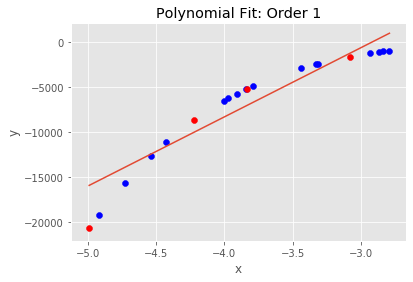

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:2
Training Cost: 49419.19025014145
Testing Cost: 159974.12132601696
Noise: 71530.17646531656
Hypothesis: -33832.66 + -23006.67x^1 + -4053.85x^2


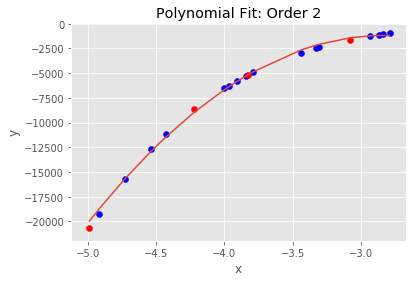

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:3
Training Cost: 295.3481401235089
Testing Cost: 1164.501651241545
Noise: 469.1788423471162
Hypothesis: 23845.13 + 24072.19x^1 + 8494.30x^2 + 1093.40x^3


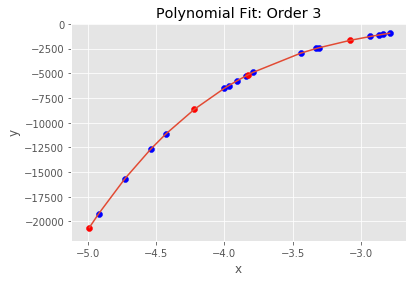

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:4
Training Cost: 0.25480411960054994
Testing Cost: 0.3894941891039254
Noise: 0.281742133501225
Hypothesis: -6411.63 + -8586.29x^1 + -4550.27x^2 + -1192.89x^3 + -148.43x^4


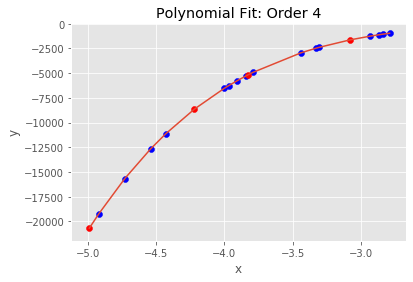

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:5
Training Cost: 0.1385489043443969
Testing Cost: 0.22536230615580355
Noise: 0.1559115847066782
Hypothesis: -1.14 + -0.75x^1 + 2.25x^2 + 2.04x^3 + 6.86x^4 + 8.00x^5


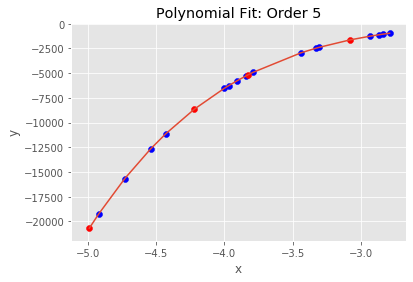

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:6
Training Cost: 0.13644642566185752
Testing Cost: 0.15164186682095232
Noise: 0.13948551389367647
Hypothesis: -149.12 + -22.42x^1 + 132.56x^2 + 98.73x^3 + 35.75x^4 + 12.01x^5 + 0.22x^6


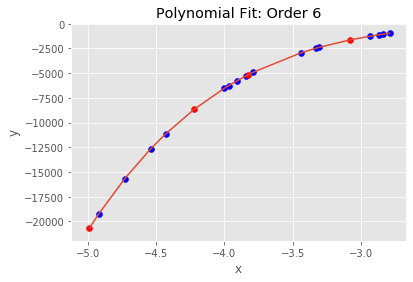

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:7
Training Cost: 0.13882218180340783
Testing Cost: 0.13225709456867943
Noise: 0.13750916435646215
Hypothesis: -22.83 + 14.47x^1 + 7.91x^2 + -21.41x^3 + -12.19x^4 + 2.06x^5 + -0.85x^6 + -0.05x^7


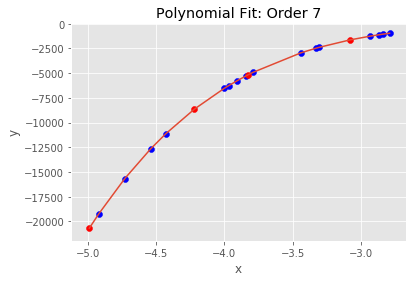

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:8
Training Cost: 0.13720780101898844
Testing Cost: 0.15822131392364527
Noise: 0.1414105035999198
Hypothesis: -5.16 + 5.19x^1 + -1.55x^2 + -5.49x^3 + 6.38x^4 + 9.96x^5 + 0.84x^6 + 0.14x^7 + 0.01x^8


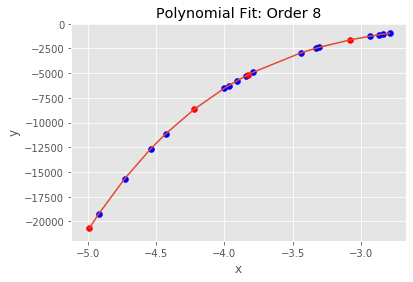

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:9
Training Cost: 0.13767544409151145
Testing Cost: 0.14841979171872138
Noise: 0.1398243136169534
Hypothesis: 0.24 + -0.45x^1 + 0.72x^2 + -0.85x^3 + 0.30x^4 + 1.49x^5 + -3.09x^6 + -0.77x^7 + -0.10x^8 + -0.00x^9


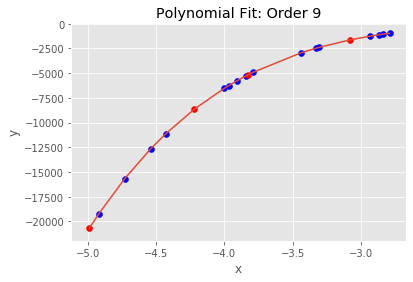

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:10
Training Cost: 0.18490864586911587
Testing Cost: 0.5498082520554461
Noise: 0.2578885671063819
Hypothesis: -0.04 + 0.09x^1 + -0.21x^2 + 0.41x^3 + -0.74x^4 + 1.13x^5 + -1.27x^6 + 0.70x^7 + 0.36x^8 + 0.06x^9 + 0.00x^10


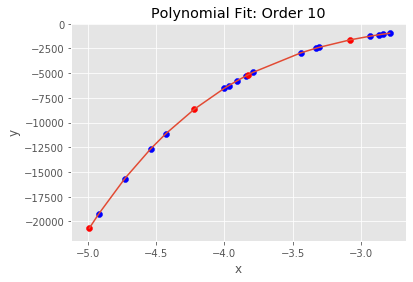

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:11
Training Cost: 0.17036396771108842
Testing Cost: 0.30634128374443736
Noise: 0.19755943091775824
Hypothesis: -0.04 + 0.08x^1 + -0.18x^2 + 0.37x^3 + -0.69x^4 + 1.09x^5 + -1.29x^6 + 0.77x^7 + 0.42x^8 + 0.08x^9 + 0.01x^10 + 0.00x^11


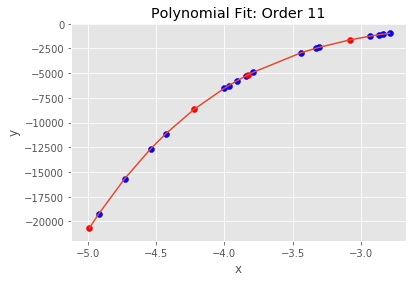

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:12
Training Cost: 1.6758405670088643
Testing Cost: 23.406987424252083
Noise: 6.022069938457507
Hypothesis: -0.01 + 0.03x^1 + -0.06x^2 + 0.14x^3 + -0.28x^4 + 0.52x^5 + -0.80x^6 + 0.91x^7 + -0.40x^8 + -0.56x^9 + -0.19x^10 + -0.03x^11 + -0.00x^12


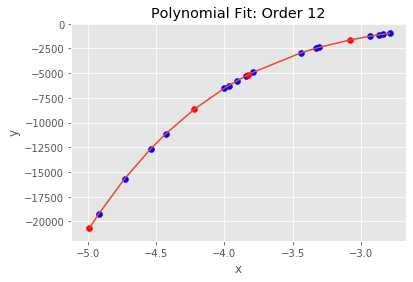

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:13
Training Cost: 34.89961619601482
Testing Cost: 457.41789644131006
Noise: 119.40327224507386
Hypothesis: -0.00 + 0.01x^1 + -0.01x^2 + 0.03x^3 + -0.08x^4 + 0.16x^5 + -0.29x^6 + 0.45x^7 + -0.50x^8 + 0.19x^9 + 0.38x^10 + 0.14x^11 + 0.02x^12 + 0.00x^13


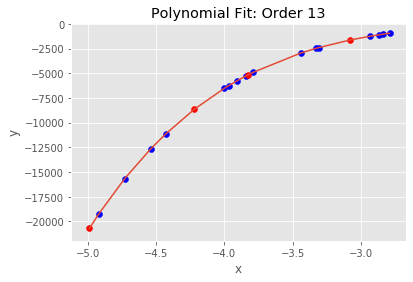

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:14
Training Cost: 253.03544903730167
Testing Cost: 3136.288916692049
Noise: 829.6861425682512
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.02x^4 + 0.04x^5 + -0.07x^6 + 0.14x^7 + -0.21x^8 + 0.24x^9 + -0.08x^10 + -0.20x^11 + -0.08x^12 + -0.01x^13 + -0.00x^14


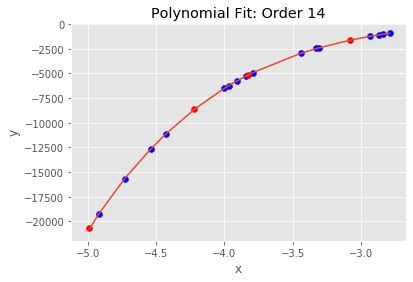

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:15
Training Cost: 1076.7333121987144
Testing Cost: 13597.263065075416
Noise: 3580.839262774055
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.01x^5 + -0.01x^6 + 0.03x^7 + -0.06x^8 + 0.09x^9 + -0.10x^10 + 0.03x^11 + 0.09x^12 + 0.04x^13 + 0.01x^14 + 0.00x^15


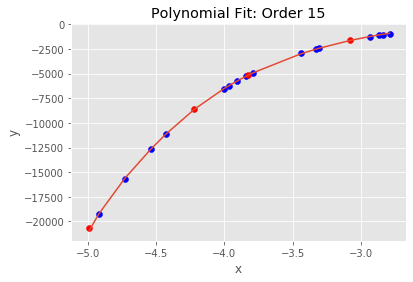

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:16
Training Cost: 3270.4879502744225
Testing Cost: 46880.8829898577
Noise: 11992.566958191079
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.01x^7 + -0.01x^8 + 0.02x^9 + -0.04x^10 + 0.04x^11 + -0.01x^12 + -0.04x^13 + -0.01x^14 + -0.00x^15 + -0.00x^16


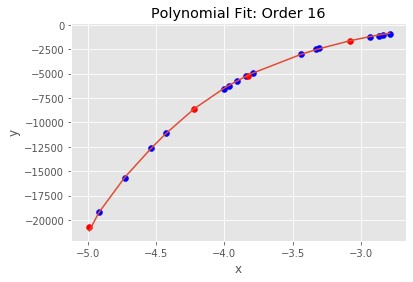

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:17
Training Cost: 7868.282509541534
Testing Cost: 143804.59781600637
Noise: 35055.545570834496
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.01x^10 + 0.01x^11 + -0.01x^12 + 0.00x^13 + 0.01x^14 + 0.01x^15 + 0.00x^16 + 0.00x^17


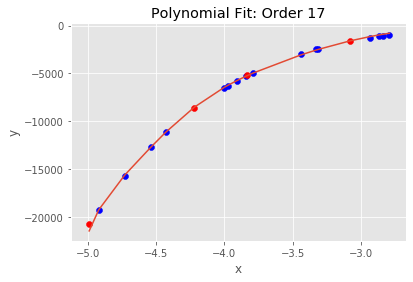

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:18
Training Cost: 16009.59947889698
Testing Cost: 412295.3235011602
Noise: 95266.74428334963
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.00x^10 + 0.00x^11 + -0.00x^12 + 0.01x^13 + -0.00x^14 + -0.00x^15 + -0.00x^16 + -0.00x^17 + -0.00x^18


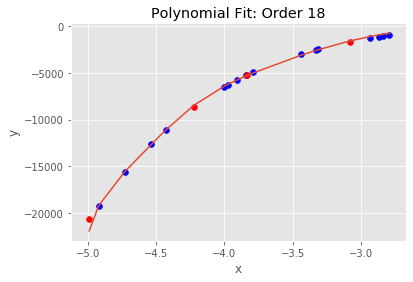

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:19
Training Cost: 28820.707541263775
Testing Cost: 1123886.0558292717
Noise: 247833.7771988653
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.00x^10 + 0.00x^11 + -0.00x^12 + 0.00x^13 + -0.00x^14 + 0.00x^15 + 0.00x^16 + 0.00x^17 + 0.00x^18 + 0.00x^19


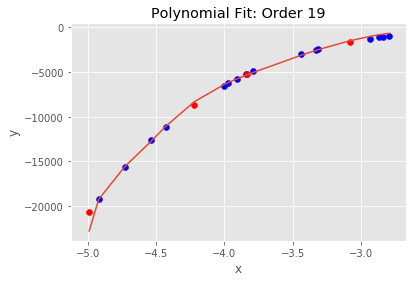

In [13]:
Training_errs = []
Testing_errs = []
for i in range(1,20):
    [tr,ts] = main_f(i,0,20)
    Training_errs.append(tr)
    Testing_errs.append(ts)

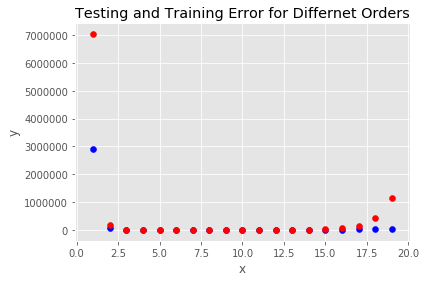

In [149]:
plt.scatter(np.arange(1, len(Training_errs )+1),Training_errs ,c='b')
plt.scatter(np.arange(1, len(Testing_errs)+1),Testing_errs,c='r')
plt.title('Testing and Training Error for Differnet Orders')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()


In [44]:
table = []
table.append(['Order','Training Error','Testing Error'])
for i in range(0,len(Training_errs)):
    table.append([i+1,Training_errs[i],Testing_errs[i]])
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤══════════════════╤══════════════════╕
│   Order │   Training Error │    Testing Error │
╞═════════╪══════════════════╪══════════════════╡
│       1 │      2.90136e+06 │      7.02427e+06 │
├─────────┼──────────────────┼──────────────────┤
│       2 │  49419.2         │ 159974           │
├─────────┼──────────────────┼──────────────────┤
│       3 │    295.348       │   1164.5         │
├─────────┼──────────────────┼──────────────────┤
│       4 │      0.254804    │      0.389494    │
├─────────┼──────────────────┼──────────────────┤
│       5 │      0.138549    │      0.225362    │
├─────────┼──────────────────┼──────────────────┤
│       6 │      0.136446    │      0.151642    │
├─────────┼──────────────────┼──────────────────┤
│       7 │      0.138822    │      0.132257    │
├─────────┼──────────────────┼──────────────────┤
│       8 │      0.137208    │      0.158221    │
├─────────┼──────────────────┼──────────────────┤
│       9 │      0.137675    │      0.14842     │


##Best Order = 7

mean_square_error
Calculating w by psuedo_inverse
Polynomial Order:7
Training Cost: 0.13882218180340783
Testing Cost: 0.13225709456867943
Noise: 0.13750916435646215
Hypothesis: -22.83 + 14.47x^1 + 7.91x^2 + -21.41x^3 + -12.19x^4 + 2.06x^5 + -0.85x^6 + -0.05x^7


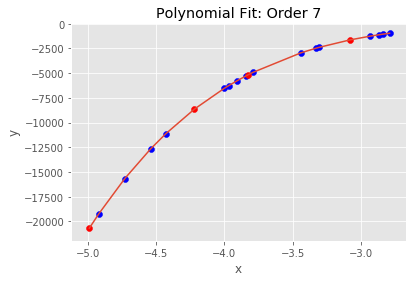

[0.13882218180340783, 0.13225709456867943]

In [154]:
main_f(7,0,20)

In [3]:
def reg_wbypsuedoinv(x, y,lamda,order=1): 
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(
        np.transpose(X),X) + lamda*np.identity(order+1)),
        np.transpose(X)),y)
    X=np.transpose(X)
    return w

In [4]:
def reg_perf_on_test(X_train, Y_train, X_test, Y_test,order,lamda):
    w = reg_wbypsuedoinv(X_train, Y_train,lamda,order)
    cost_train= error(X_train, Y_train, w,0,0)
    print('Training Cost: ' + str(cost_train))
    cost_test= error(X_test, Y_test, w, 0,0)
    print('Testing Cost: ' + str(cost_test))
    noisee = noise(X,w,Y)
    print('Noise: ' + str(noisee))
    plt.figure(1)
    plt.scatter(X_train,Y_train,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        func += w[i] * X ** i 
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i)) 
    label = ''.join(labelr)
    print('Hypothesis: ' + str(label))
    plt.plot(X, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    plt.show()
    return [cost_train,cost_test]

In [5]:
def reg_main_f(order,size,lamda): 
    print('Calculating w by regularised psuedo_inverse')
        
    print('Polynomial Order:' + str(order))
    
    print('Value of Lamda: ' + str(lamda))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    return reg_perf_on_test(X_train, Y_train, X_test, Y_test,order,lamda)

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-11
Training Cost: 0.13807836067045107
Testing Cost: 0.1719093706499905
Noise: 0.14484456266635892
Hypothesis: -22.81 + 14.46x^1 + 7.90x^2 + -21.40x^3 + -12.18x^4 + 2.07x^5 + -0.85x^6 + -0.05x^7


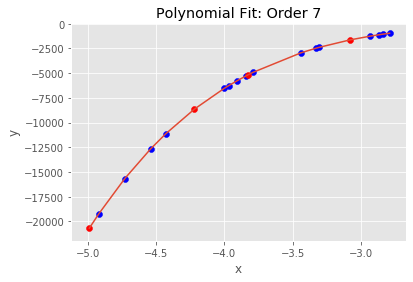

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-10
Training Cost: 0.136937839434889
Testing Cost: 0.14893648951194366
Noise: 0.13933756945029993
Hypothesis: -22.81 + 14.47x^1 + 7.90x^2 + -21.40x^3 + -12.18x^4 + 2.07x^5 + -0.85x^6 + -0.05x^7


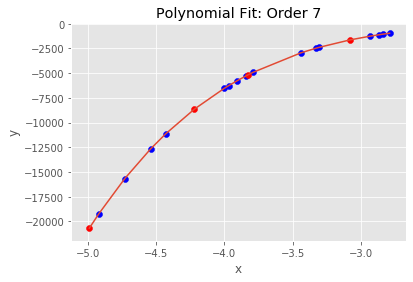

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-09
Training Cost: 0.13866068330208145
Testing Cost: 0.13215163648898948
Noise: 0.13735887393946306
Hypothesis: -22.81 + 14.46x^1 + 7.90x^2 + -21.40x^3 + -12.18x^4 + 2.07x^5 + -0.84x^6 + -0.05x^7


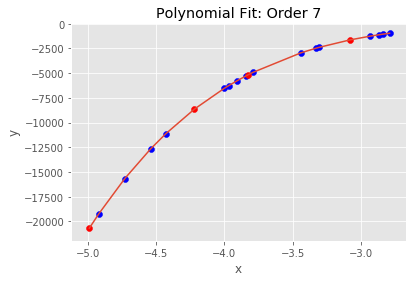

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-08
Training Cost: 0.13838344512873318
Testing Cost: 0.17425350532184772
Noise: 0.14555745716735607
Hypothesis: -22.80 + 14.45x^1 + 7.89x^2 + -21.40x^3 + -12.17x^4 + 2.07x^5 + -0.84x^6 + -0.05x^7


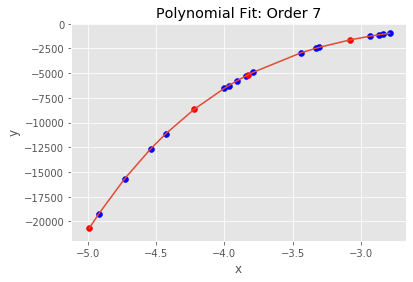

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-07
Training Cost: 0.13703361834138672
Testing Cost: 0.15824321761365112
Noise: 0.1412755381958396
Hypothesis: -22.68 + 14.38x^1 + 7.85x^2 + -21.29x^3 + -12.09x^4 + 2.10x^5 + -0.84x^6 + -0.05x^7


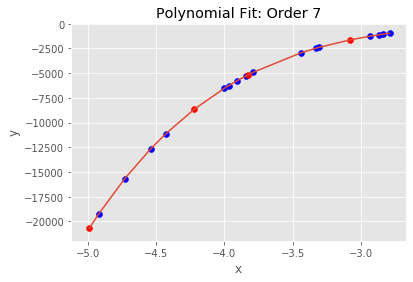

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-06
Training Cost: 0.13708374975196766
Testing Cost: 0.16084775490562095
Noise: 0.1418365507826983
Hypothesis: -21.48 + 13.64x^1 + 7.42x^2 + -20.27x^3 + -11.20x^4 + 2.38x^5 + -0.80x^6 + -0.04x^7


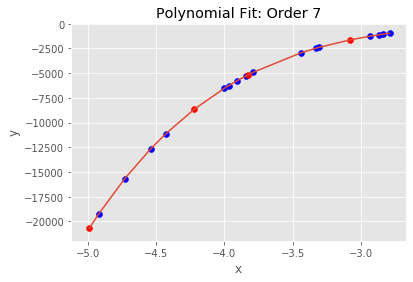

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-05
Training Cost: 0.13713209660166956
Testing Cost: 0.17563721472887733
Noise: 0.14483312022711112
Hypothesis: -14.24 + 9.19x^1 + 4.83x^2 + -14.14x^3 + -5.91x^4 + 4.05x^5 + -0.56x^6 + -0.03x^7


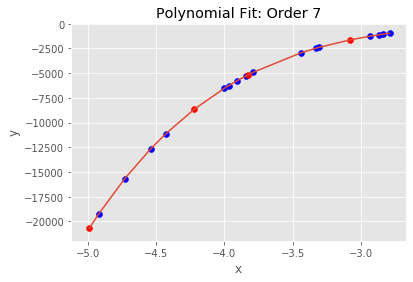

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.0001
Training Cost: 0.13798439588544092
Testing Cost: 0.19459544286890246
Noise: 0.14930660528213321
Hypothesis: -4.12 + 2.80x^1 + 1.26x^2 + -5.34x^3 + 1.65x^4 + 6.44x^5 + -0.22x^6 + -0.01x^7


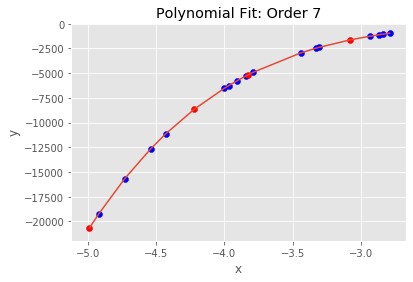

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.0005
Training Cost: 0.13813267743168473
Testing Cost: 0.2072755653013871
Noise: 0.1519612550056252
Hypothesis: -1.73 + 1.43x^1 + 0.42x^2 + -3.53x^3 + 3.20x^4 + 6.92x^5 + -0.15x^6 + -0.01x^7


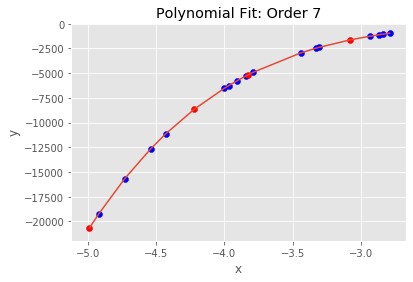

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.001
Training Cost: 0.13821467526418196
Testing Cost: 0.20764489102139688
Noise: 0.15210071841562497
Hypothesis: -1.37 + 1.19x^1 + 0.34x^2 + -3.28x^3 + 3.37x^4 + 6.96x^5 + -0.15x^6 + -0.01x^7


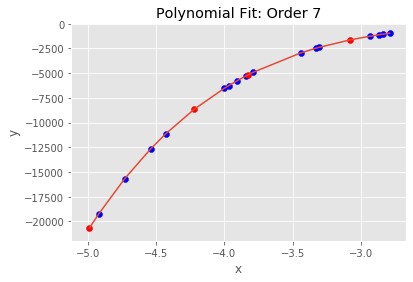

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.01
Training Cost: 0.14165427567395675
Testing Cost: 0.20141125528460996
Noise: 0.1536056715960874
Hypothesis: -0.59 + 0.36x^1 + 0.84x^2 + -3.05x^3 + 2.83x^4 + 6.62x^5 + -0.22x^6 + -0.01x^7


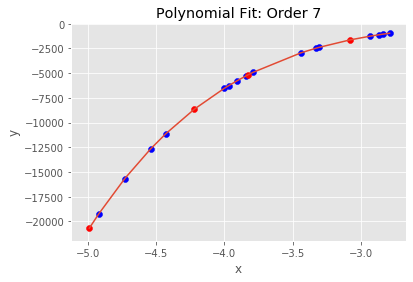

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.05
Training Cost: 0.15646366923713487
Testing Cost: 0.2227253516350188
Noise: 0.16971600571671164
Hypothesis: 0.13 + -0.62x^1 + 1.72x^2 + -3.03x^3 + 1.73x^4 + 6.02x^5 + -0.34x^6 + -0.02x^7


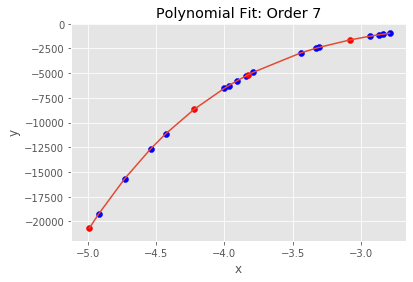

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.1
Training Cost: 0.16514639188530653
Testing Cost: 0.24639094395269587
Noise: 0.1813953022987844
Hypothesis: 0.36 + -0.95x^1 + 2.02x^2 + -3.02x^3 + 1.36x^4 + 5.80x^5 + -0.38x^6 + -0.02x^7


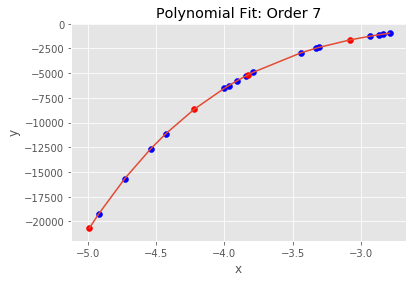

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 0.5
Training Cost: 0.2141369232733506
Testing Cost: 0.42889063916186076
Noise: 0.25708766645105263
Hypothesis: 0.61 + -1.28x^1 + 2.29x^2 + -2.93x^3 + 0.89x^4 + 5.48x^5 + -0.45x^6 + -0.03x^7


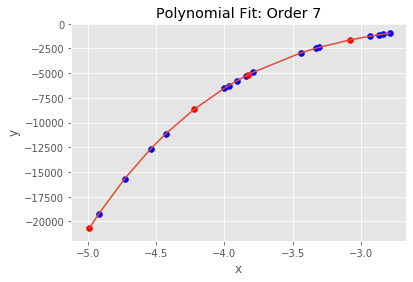

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1
Training Cost: 0.3282965159972846
Testing Cost: 0.7936407118992611
Noise: 0.4213653551776798
Hypothesis: 0.62 + -1.29x^1 + 2.25x^2 + -2.82x^3 + 0.76x^4 + 5.34x^5 + -0.49x^6 + -0.03x^7


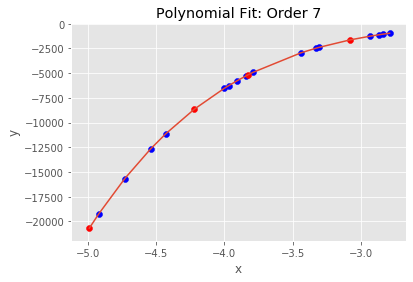

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 5
Training Cost: 2.6195652670621863
Testing Cost: 7.081693565794905
Noise: 3.5119909268087306
Hypothesis: 0.52 + -1.04x^1 + 1.78x^2 + -2.13x^3 + 0.32x^4 + 4.64x^5 + -0.70x^6 + -0.05x^7


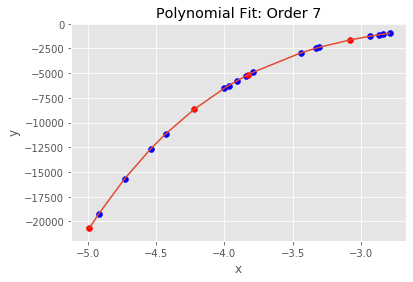

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 10
Training Cost: 6.407594558795281
Testing Cost: 17.153456614420065
Noise: 8.556766969920238
Hypothesis: 0.41 + -0.82x^1 + 1.38x^2 + -1.59x^3 + 0.01x^4 + 4.10x^5 + -0.87x^6 + -0.07x^7


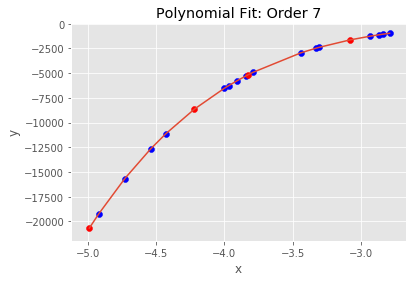

In [40]:
Reg_training_errs = []
Reg_testing_errs = []
Lamda = [0.00000000001,0.0000000001,0.000000001,0.00000001,
         0.0000001,0.000001,0.00001,0.0001,0.0005, 0.001,
         0.01,0.05,0.1,0.5,1,5,10]
for i in Lamda:
    [tr,ts] = reg_main_f(7,20,i)
    Reg_training_errs.append(tr)
    Reg_testing_errs.append(ts)


In [142]:
print(Reg_training_errs)
print(Reg_testing_errs)

[0.13807836067045107, 0.136937839434889, 0.13866068330208145, 0.13838344512873318, 0.13703361834138672, 0.13708374975196766, 0.13713209660166956, 0.13798439588544092, 0.13813267743168473, 0.13821467526418196, 0.14165427567395675, 0.15646366923713487, 0.16514639188530653, 0.2141369232733506, 0.3282965159972846, 2.6195652670621863, 6.407594558795281]
[0.1719093706499905, 0.14893648951194366, 0.13215163648898948, 0.17425350532184772, 0.15824321761365112, 0.16084775490562095, 0.17563721472887733, 0.19459544286890246, 0.2072755653013871, 0.20764489102139688, 0.20141125528460996, 0.2227253516350188, 0.24639094395269587, 0.42889063916186076, 0.7936407118992611, 7.081693565794905, 17.153456614420065]


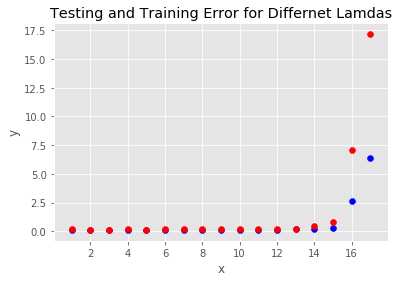

In [145]:
plt.scatter(np.arange(1, len(Reg_training_errs)+1),Reg_training_errs ,c='b')
plt.scatter(np.arange(1, len(Reg_testing_errs)+1),Reg_testing_errs,c='r')
plt.title('Testing and Training Error for Differnet Lamdas')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()


In [41]:
table = []
table.append(['Lambda value','Training Error','Testing Error'])
for i in range(0,len(Reg_training_errs)):
    table.append([Lamda[i],Reg_training_errs[i],Reg_testing_errs[i]])
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤══════════════════╤═════════════════╕
│   Lambda value │   Training Error │   Testing Error │
╞════════════════╪══════════════════╪═════════════════╡
│         1e-11  │         0.138078 │        0.171909 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-10  │         0.136938 │        0.148936 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-09  │         0.138661 │        0.132152 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-08  │         0.138383 │        0.174254 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-07  │         0.137034 │        0.158243 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-06  │         0.137084 │        0.160848 │
├────────────────┼──────────────────┼─────────────────┤
│         1e-05  │         0.137132 │        0.175637 │
├────────────────┼──────────────────┼─────────────────┤
│         0.0001 │         0.137984 │        0.1

Lasso Regression: TBD

Calculating w by regularised psuedo_inverse
Polynomial Order:1
Value of Lamda: 1e-09
Training Cost: 2901364.685820794
Testing Cost: 7024272.383000045
Noise: 3725946.225256645
Hypothesis: 22357.14 + 7668.98x^1


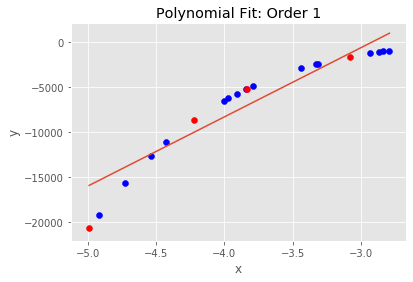

Calculating w by regularised psuedo_inverse
Polynomial Order:2
Value of Lamda: 1e-09
Training Cost: 49419.19025015106
Testing Cost: 159974.2082921835
Noise: 71530.19385855757
Hypothesis: -33832.66 + -23006.66x^1 + -4053.85x^2


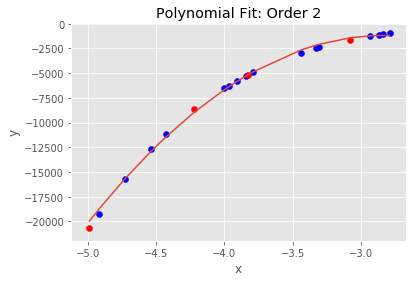

Calculating w by regularised psuedo_inverse
Polynomial Order:3
Value of Lamda: 1e-09
Training Cost: 295.3481406742544
Testing Cost: 1164.5525372500495
Noise: 469.18901998941345
Hypothesis: 23844.94 + 24072.03x^1 + 8494.26x^2 + 1093.40x^3


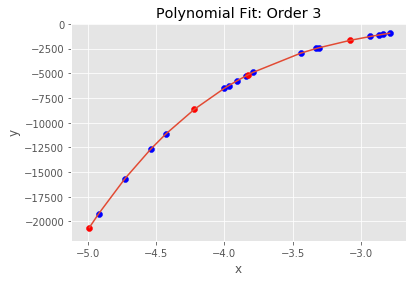

Calculating w by regularised psuedo_inverse
Polynomial Order:4
Value of Lamda: 1e-09
Training Cost: 0.25480791678436865
Testing Cost: 0.3919227672087111
Noise: 0.28223088686923714
Hypothesis: -6408.15 + -8582.54x^1 + -4548.78x^2 + -1192.63x^3 + -148.42x^4


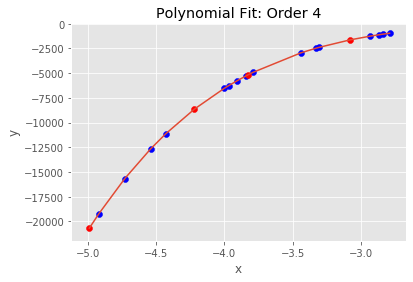

Calculating w by regularised psuedo_inverse
Polynomial Order:5
Value of Lamda: 1e-09
Training Cost: 0.13854890809127227
Testing Cost: 0.22533456509034838
Noise: 0.15590603949108747
Hypothesis: -1.14 + -0.75x^1 + 2.25x^2 + 2.04x^3 + 6.86x^4 + 8.00x^5


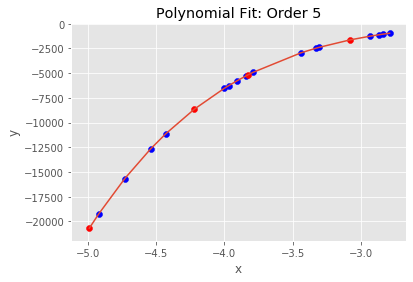

Calculating w by regularised psuedo_inverse
Polynomial Order:6
Value of Lamda: 1e-09
Training Cost: 0.13641577742192224
Testing Cost: 0.14569671150771368
Noise: 0.13827196423908053
Hypothesis: -148.76 + -22.35x^1 + 132.27x^2 + 98.51x^3 + 35.68x^4 + 12.01x^5 + 0.21x^6


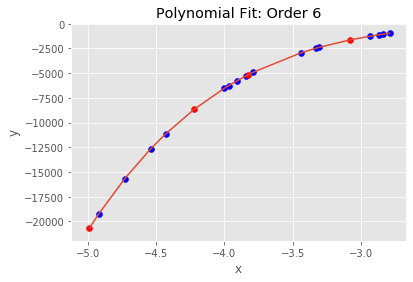

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-09
Training Cost: 0.13866068330208145
Testing Cost: 0.13215163648898948
Noise: 0.13735887393946306
Hypothesis: -22.81 + 14.46x^1 + 7.90x^2 + -21.40x^3 + -12.18x^4 + 2.07x^5 + -0.84x^6 + -0.05x^7


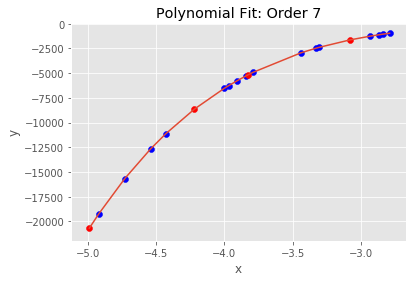

Calculating w by regularised psuedo_inverse
Polynomial Order:8
Value of Lamda: 1e-09
Training Cost: 0.13854315600795178
Testing Cost: 0.14007138462816154
Noise: 0.1388488017319937
Hypothesis: -5.16 + 5.19x^1 + -1.55x^2 + -5.49x^3 + 6.38x^4 + 9.96x^5 + 0.84x^6 + 0.14x^7 + 0.01x^8


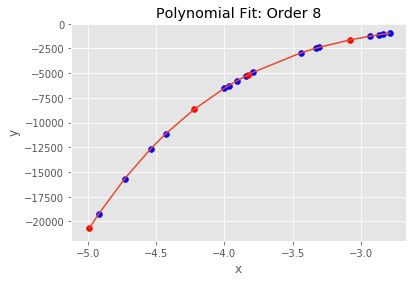

Calculating w by regularised psuedo_inverse
Polynomial Order:9
Value of Lamda: 1e-09
Training Cost: 0.13767585475656985
Testing Cost: 0.1482776423025993
Noise: 0.1397962122657757
Hypothesis: 0.24 + -0.45x^1 + 0.72x^2 + -0.85x^3 + 0.30x^4 + 1.49x^5 + -3.09x^6 + -0.77x^7 + -0.10x^8 + -0.00x^9


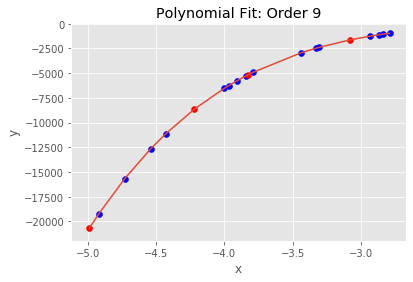

Calculating w by regularised psuedo_inverse
Polynomial Order:10
Value of Lamda: 1e-09
Training Cost: 0.18490837417788958
Testing Cost: 0.5486198658766666
Noise: 0.25765067251764506
Hypothesis: -0.04 + 0.09x^1 + -0.21x^2 + 0.41x^3 + -0.74x^4 + 1.13x^5 + -1.27x^6 + 0.70x^7 + 0.36x^8 + 0.06x^9 + 0.00x^10


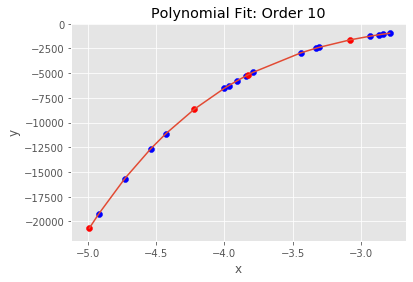

Calculating w by regularised psuedo_inverse
Polynomial Order:11
Value of Lamda: 1e-09
Training Cost: 0.17036391291342032
Testing Cost: 0.30628596964870114
Noise: 0.1975483242604765
Hypothesis: -0.04 + 0.08x^1 + -0.18x^2 + 0.37x^3 + -0.69x^4 + 1.09x^5 + -1.29x^6 + 0.77x^7 + 0.42x^8 + 0.08x^9 + 0.01x^10 + 0.00x^11


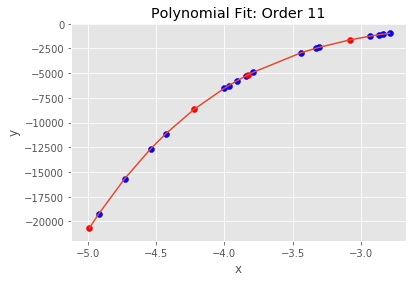

Calculating w by regularised psuedo_inverse
Polynomial Order:12
Value of Lamda: 1e-09
Training Cost: 1.6758428466535038
Testing Cost: 23.419459405404034
Noise: 6.02456615840361
Hypothesis: -0.01 + 0.03x^1 + -0.06x^2 + 0.14x^3 + -0.28x^4 + 0.52x^5 + -0.80x^6 + 0.91x^7 + -0.40x^8 + -0.56x^9 + -0.19x^10 + -0.03x^11 + -0.00x^12


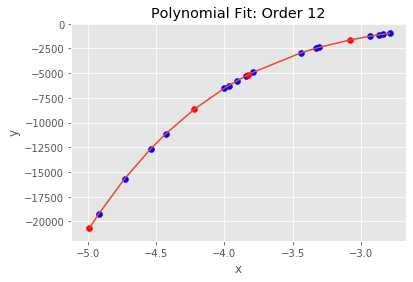

Calculating w by regularised psuedo_inverse
Polynomial Order:13
Value of Lamda: 1e-09
Training Cost: 34.899611255009894
Testing Cost: 457.33532820947295
Noise: 119.38675464590249
Hypothesis: -0.00 + 0.01x^1 + -0.01x^2 + 0.03x^3 + -0.08x^4 + 0.16x^5 + -0.29x^6 + 0.45x^7 + -0.50x^8 + 0.19x^9 + 0.38x^10 + 0.14x^11 + 0.02x^12 + 0.00x^13


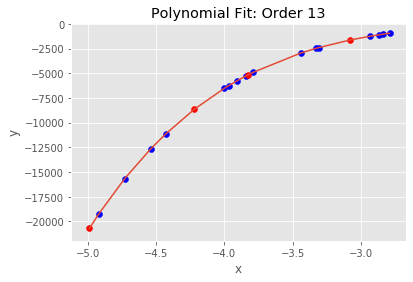

Calculating w by regularised psuedo_inverse
Polynomial Order:14
Value of Lamda: 1e-09
Training Cost: 253.03541747562298
Testing Cost: 3134.963779702484
Noise: 829.4210899209951
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.02x^4 + 0.04x^5 + -0.07x^6 + 0.14x^7 + -0.21x^8 + 0.24x^9 + -0.08x^10 + -0.20x^11 + -0.08x^12 + -0.01x^13 + -0.00x^14


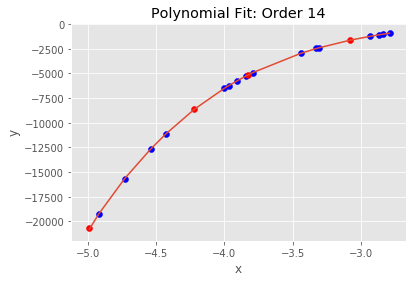

Calculating w by regularised psuedo_inverse
Polynomial Order:15
Value of Lamda: 1e-09
Training Cost: 1076.7332635359903
Testing Cost: 13599.793550370016
Noise: 3581.345320902795
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.01x^5 + -0.01x^6 + 0.03x^7 + -0.06x^8 + 0.09x^9 + -0.10x^10 + 0.03x^11 + 0.09x^12 + 0.04x^13 + 0.01x^14 + 0.00x^15


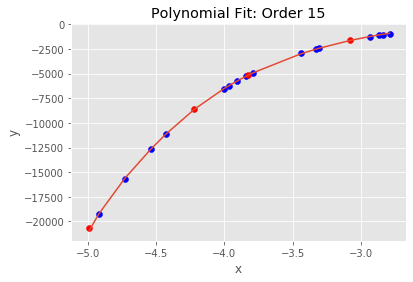

Calculating w by regularised psuedo_inverse
Polynomial Order:16
Value of Lamda: 1e-09
Training Cost: 3270.4879502137383
Testing Cost: 46880.88546758572
Noise: 11992.567453688138
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.01x^7 + -0.01x^8 + 0.02x^9 + -0.04x^10 + 0.04x^11 + -0.01x^12 + -0.04x^13 + -0.01x^14 + -0.00x^15 + -0.00x^16


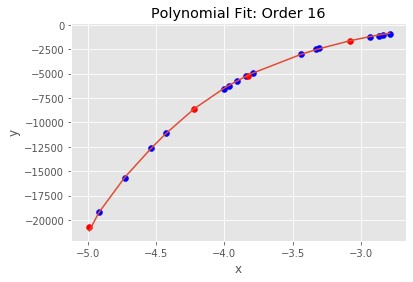

Calculating w by regularised psuedo_inverse
Polynomial Order:17
Value of Lamda: 1e-09
Training Cost: 7868.282509541534
Testing Cost: 143804.59781600637
Noise: 35055.545570834496
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.01x^10 + 0.01x^11 + -0.01x^12 + 0.00x^13 + 0.01x^14 + 0.01x^15 + 0.00x^16 + 0.00x^17


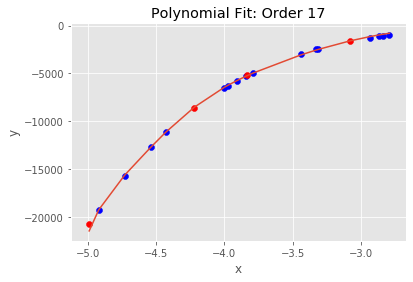

Calculating w by regularised psuedo_inverse
Polynomial Order:18
Value of Lamda: 1e-09
Training Cost: 16009.59947889698
Testing Cost: 412295.3235011602
Noise: 95266.74428334963
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.00x^10 + 0.00x^11 + -0.00x^12 + 0.01x^13 + -0.00x^14 + -0.00x^15 + -0.00x^16 + -0.00x^17 + -0.00x^18


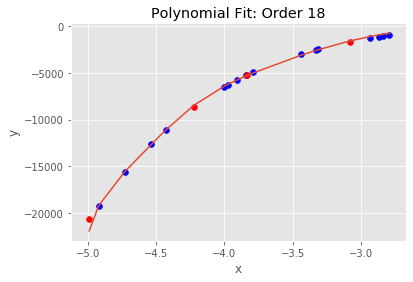

Calculating w by regularised psuedo_inverse
Polynomial Order:19
Value of Lamda: 1e-09
Training Cost: 28820.707541263775
Testing Cost: 1123886.0558292717
Noise: 247833.7771988653
Hypothesis: -0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.00x^4 + 0.00x^5 + -0.00x^6 + 0.00x^7 + -0.00x^8 + 0.00x^9 + -0.00x^10 + 0.00x^11 + -0.00x^12 + 0.00x^13 + -0.00x^14 + 0.00x^15 + 0.00x^16 + 0.00x^17 + 0.00x^18 + 0.00x^19


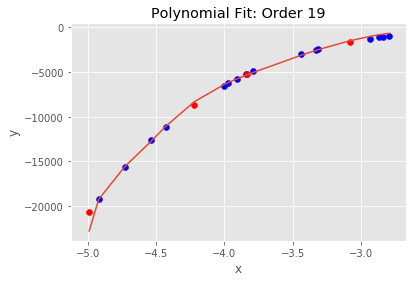

In [42]:
Reg_training_errs = []
Reg_testing_errs = []
for i in range(1,20):
    [tr,ts] = reg_main_f(i,20,0.000000001)
    Reg_training_errs.append(tr)
    Reg_testing_errs.append(ts)

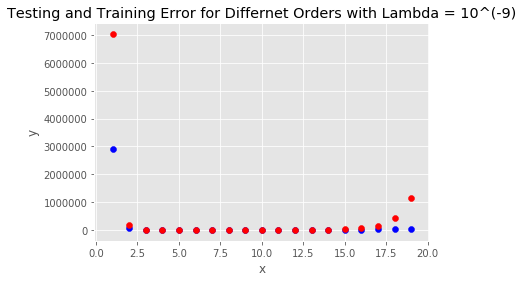

In [19]:
plt.scatter(np.arange(1, len(Reg_training_errs)+1),Reg_training_errs ,c='b')
plt.scatter(np.arange(1, len(Reg_testing_errs)+1),Reg_testing_errs,c='r')
plt.title('Testing and Training Error for Differnet Orders with Lambda = 10^(-9)')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()

In [20]:
print(Reg_training_errs)
print(Reg_testing_errs)

[2901364.685820794, 49419.19025015106, 295.3481406742544, 0.25480791678436865, 0.13854890809127227, 0.13641577742192224, 0.13866068330208145, 0.13854315600795178, 0.13767585475656985, 0.18490837417788958, 0.17036391291342032, 1.6758428466535038, 34.899611255009894, 253.03541747562298, 1076.7332635359903, 3270.4879502137383, 7868.282509541534, 16009.59947889698, 28820.707541263775]
[7024272.383000045, 159974.2082921835, 1164.5525372500495, 0.3919227672087111, 0.22533456509034838, 0.14569671150771368, 0.13215163648898948, 0.14007138462816154, 0.1482776423025993, 0.5486198658766666, 0.30628596964870114, 23.419459405404034, 457.33532820947295, 3134.963779702484, 13599.793550370016, 46880.88546758572, 143804.59781600637, 412295.3235011602, 1123886.0558292717]


Best order: 7

Calculating w by regularised psuedo_inverse
Polynomial Order:7
Value of Lamda: 1e-09
Training Cost: 0.13866068330208145
Testing Cost: 0.13215163648898948
Noise: 0.13735887393946306
Hypothesis: -22.81 + 14.46x^1 + 7.90x^2 + -21.40x^3 + -12.18x^4 + 2.07x^5 + -0.84x^6 + -0.05x^7


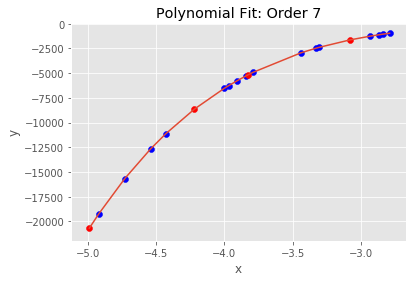

[0.13866068330208145, 0.13215163648898948]

In [153]:
reg_main_f(7,20,0.000000001)

In [39]:
table = []
table.append(['Order','Training Error','Testing Error'])
for i in range(0,len(Reg_training_errs)):
    table.append([i+1,Reg_training_errs[i],Reg_testing_errs[i]])
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤══════════════════╤══════════════════╕
│   Order │   Training Error │    Testing Error │
╞═════════╪══════════════════╪══════════════════╡
│       1 │      2.90136e+06 │      7.02427e+06 │
├─────────┼──────────────────┼──────────────────┤
│       2 │  49419.2         │ 159974           │
├─────────┼──────────────────┼──────────────────┤
│       3 │    295.348       │   1164.55        │
├─────────┼──────────────────┼──────────────────┤
│       4 │      0.254808    │      0.391923    │
├─────────┼──────────────────┼──────────────────┤
│       5 │      0.138549    │      0.225335    │
├─────────┼──────────────────┼──────────────────┤
│       6 │      0.136416    │      0.145697    │
├─────────┼──────────────────┼──────────────────┤
│       7 │      0.138661    │      0.132152    │
├─────────┼──────────────────┼──────────────────┤
│       8 │      0.138543    │      0.140071    │
├─────────┼──────────────────┼──────────────────┤
│       9 │      0.137676    │      0.148278    │
